Importando as bibliotecas


In [114]:
# import seaborn as sns
# import sklearn as sk
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

# from numpy.core.defchararray import join
from random import randrange
import random as rd


In [115]:
def fetch_dataset(filename: str):
    return np.array(pd.read_csv(filename, header=0))

Função K-means


In [116]:
def my_centers(samples, n_of_centers : int) -> np.ndarray:
    """Return random centers based on the location of the samples"""
    centers, points_used = [], []
    sample_size = len(samples)
    i = 0

    while i < n_of_centers:
        new_center = randrange(sample_size)
        if new_center not in points_used: # check if the random point hasn't been chosen
            points_used.append(new_center)
            centers.append(samples[new_center])
            i += 1

    return np.array(centers)


def distance(sample, center):
    return la.norm(sample - center)


# returns which center has the minimal distance to the point and the minimal distance found
def find_minimal_distance(point, centers):
    min_pos = 0
    min_dist = distance(point, centers[0])

    for i in range(1, len(centers)):
        new_dist = distance(point, centers[i])
        if new_dist < min_dist:
            min_dist = new_dist
            min_pos = i
    return min_pos, min_dist


def my_kmeans(samples, n_of_centers : int, max_iteration: int = 1000):
    # adquire os centros dos clusters
    centers = my_centers(samples, n_of_centers)
    # inicia a separacao dos pontos em clusters
    n_of_samples = len(samples)
    over = False
    iterations = 0

    while not over and iterations < max_iteration:
        cluster_sum = [0] * n_of_centers
        cluster_number_points = [0] * n_of_centers

        # encontra a distancia minima e soma a distancia no respectivo cluster
        for i in range(n_of_samples):
            min = find_minimal_distance(samples[i], centers)
            cluster_sum[min[0]] += samples[i]
            cluster_number_points[min[0]] += 1

        # calcula a media de cada cluster e modifica os centros
        prev_center = centers.copy()
        for i in range(n_of_centers):
            if cluster_number_points[i] != 0:
                centers[i] = np.array(cluster_sum[i] / cluster_number_points[i])

        # calcula a diferenca dos centros com a interacao anterior
        diff_norm = 0
        for i in range(n_of_centers):
            diff_v = centers[i] - prev_center[i]
            diff_norm += la.norm(diff_v)

        # verifica se os centros foram muito alterados, senao encerra o algoritmo
        if diff_norm < 1e-3:
            over = True
            break

        iterations += 1

    return centers


Recebendo os dados do dataset


In [117]:
def k_elbow(amostra, centros):
    # inicializacao de variaveis
    data = [0] * (centros - 2)
    k = 2  # numero de centros

    # laço de repetição de k centros
    while k < centros:
        centroides = my_kmeans(amostra, k)
        i = 0
        soma_quadrado_distancia = 0
        # laço de repetição para calcular a soma do quadrado das distancias
        while i < len(amostra):
            array_intermediario = find_minimal_distance(amostra[i], centroides)
            soma_quadrado_distancia += array_intermediario[1] ** 2
            i += 1
        data[k - 2] = soma_quadrado_distancia
        k += 1

    # variaveis para plotar o grafico
    x = np.zeros([centros - 2])
    h = 0
    while h < centros - 2:
        x[h] = h + 2
        h += 1

    return x, data


Calculo elbow


# PCA

In [118]:
def mean(data: np.ndarray) -> np.ndarray:
    """Calculates the mean of a numpy.ndarray."""
    acc = [0] * len(data[0])
    for i in data:
        acc += i
    return np.array(acc) / len(data)


def demean(data: np.ndarray) -> np.ndarray:
    """Subtracts the mean of a numpy.ndarray from each element."""
    return data - mean(data)


def covariance(data: np.ndarray) -> np.ndarray:
    a = 0
    """Calculates the covariance of a numpy.ndarray."""
    b = 0
    return (1 / (len(data) - 1)) * np.dot(data.T, data)


def order_vectors(values: np.array, vectors: np.matrix):
    """Orders the values and vectors based on the values."""
    # val = np.sqrt(values.T * values) # magnitude of each vector
    val = values
    values_order = np.argsort(val)[::-1]  # indexes on reverse order
    return values[values_order], vectors[:, values_order] # return the sorted values and vectors

In [122]:
def PCA(data, n : int = 2):
    demeaned = demean(data)
    cov_matrix = covariance(demeaned)
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    eig_val, eig_vec = order_vectors(eig_val, eig_vec)
    return eig_vec[:, :n], demeaned


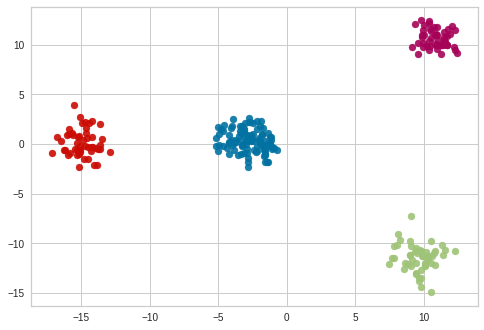

In [129]:
file = "https://raw.githubusercontent.com/G-Nozawa/K-Means-Elbow-method/main/dados/dados_parte_1.csv"
data = fetch_dataset(file)
# x, y = k_elbow(data, 7)

centers = my_kmeans(data, 4)
labels = []
for i in range(len(data)):
    labels.append(find_minimal_distance(data[i], centers)[0])
labels = np.array(labels).reshape((-1, 1))

data_label = np.hstack((data, labels))



# # # Plotting
# plt.title("Gráfico com os resultados finais")
# plt.xlabel("Número de centros")
# plt.ylabel("Soma quadrada das distâncias")
# plt.plot(x, y)
# plt.show()

eigvec, demeaned = PCA(data)

result = demeaned @ eigvec

pca_clusters = []

for i in range(4):
    sum = []
    for d in range(len(result)):
        if (labels[d] == i):
            sum.append(result[d])
    sum = np.vstack(sum)
    pca_clusters.append(sum)

for i in range(4):
      plt.scatter(pca_clusters[i][:,0], pca_clusters[i][:,1], alpha=0.9, label=i)
plt.grid("true")